In [1]:
import pandas as pd
import seaborn as sns
#df.isnull()

In [2]:
df = pd.read_csv ('titanic-passengers.csv',sep=";") 


In [3]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
df['Age'].fillna(df['Age'].mean())


0      28.000000
1      25.000000
2      20.000000
3      29.000000
4      31.000000
         ...    
886    14.000000
887    22.000000
888    30.000000
889    29.699118
890    19.000000
Name: Age, Length: 891, dtype: float64

In [5]:
val=df['Cabin'].mode()
df['Cabin'].fillna(val,inplace=True)


In [6]:
val

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [7]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S


In [8]:
df['Cabin'].isnull().sum()

685

In [9]:
df=df.drop(['Cabin'], axis=1)

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,S


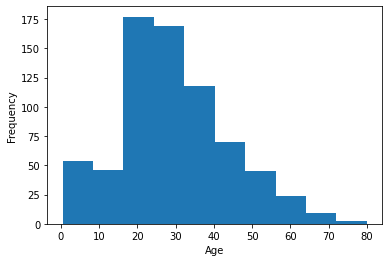

In [11]:
import matplotlib.pyplot as plt
plt.xlabel('Age')
df['Age'].plot.hist()

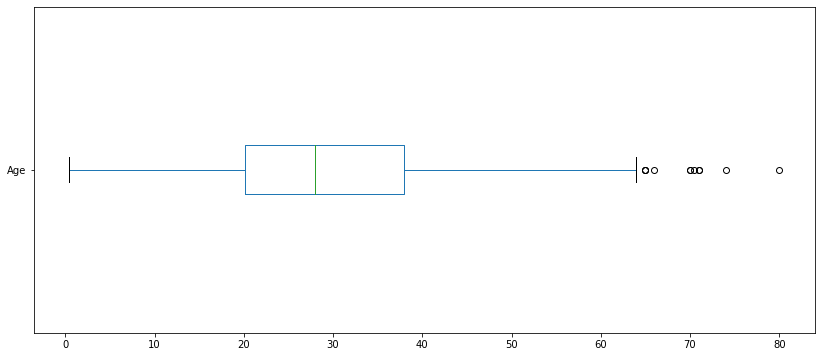

In [12]:
df['Age'].plot(kind='box', vert=False, figsize=(14,6))

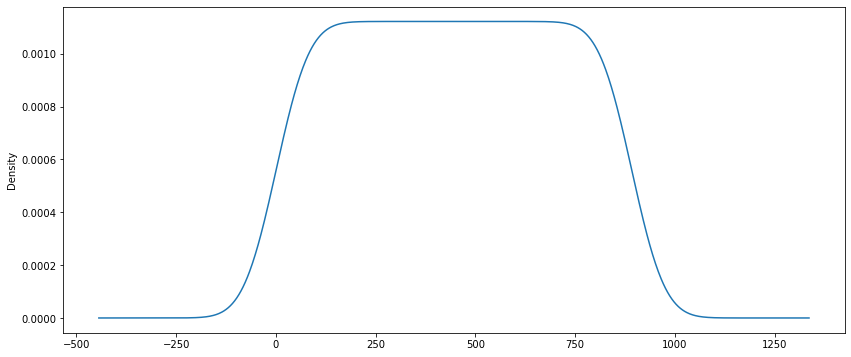

In [13]:
df['PassengerId'].plot(kind='density', figsize=(14,6))

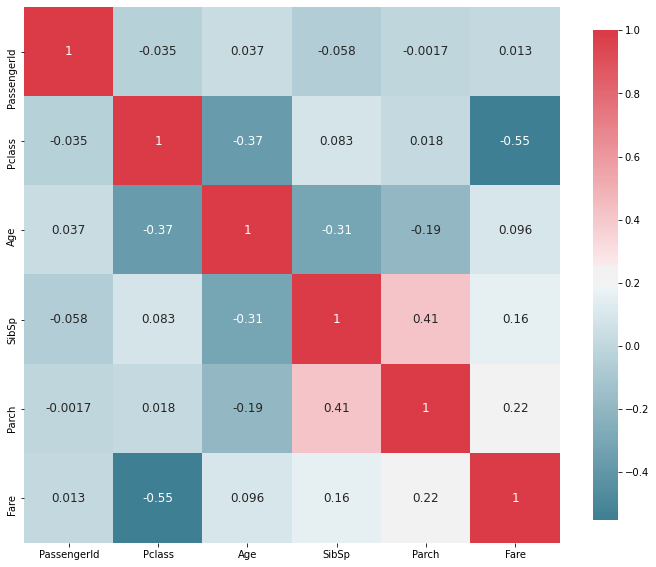

In [14]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)
   

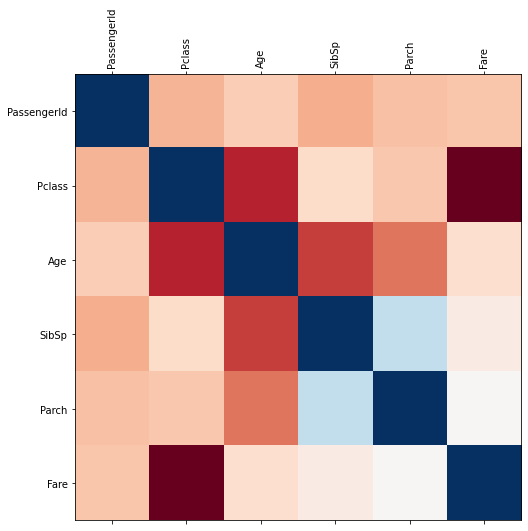

In [15]:
corr = df.corr()
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

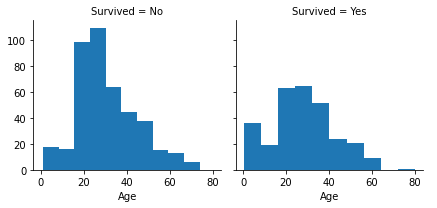

In [16]:
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist,'Age',bins=10)
g.add_legend()

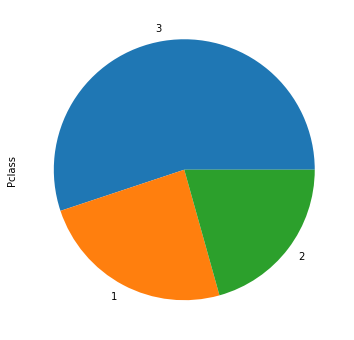

In [17]:
df['Pclass'].value_counts().plot(kind='pie', figsize=(6,6))

C:\Users\Rania\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


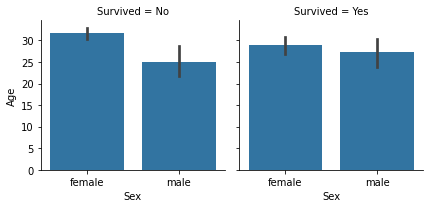

In [18]:
g=sns.FacetGrid(df,col='Survived')
g.map(sns.barplot,'Sex','Age')
g.add_legend()

In [19]:
g=sns.FacetGrid(df,col=('Survived'='Yes'))
g.map(sns.barplot,'Sex','Age')
g.add_legend()
#j'ai juste besoin des passagers vivants, comment le faire?


SyntaxError: invalid syntax (<ipython-input-19-90b0dd202f67>, line 1)

In [ ]:
df.groupby(by='Survived')['Pclass'].mean()


In [ ]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer”,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty"

                  "the Countess": "Royalty",

                    "Dona":       "Royalty”,

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }



In [ ]:
df['Title']=df['Name'].str.split(" ") 

In [ ]:
df['Title']

In [ ]:
df['Titles']=' '
for i in range(df.shape[0]) :
    #print(i)
    df['Titles'][i]=df['Title'][i][1][:-1]

In [ ]:
df['Titles']

In [ ]:
df['Title']=df['Titles']

In [ ]:
df['Title']

In [ ]:
df=df.drop(['Name'], axis=1)

In [ ]:
df

In [ ]:
df=df.drop(['Titles'], axis=1)

In [ ]:
#df['Title']=df.Name.str.extract(' ([A-Za-z]+).')
df

In [ ]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [ ]:
df.replace(Title_Dictionary,inplace=True)
df

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['Title']=encoder.fit_transform(df['Title'])


In [ ]:
corr = df.corr()
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
df['Family Size']=df['Parch']+df['SibSp']

In [ ]:
df

In [ ]:
sns.distplot(df["Family Size"], bins=1,hist=True,kde=True)


In [ ]:
plt.xlabel("Family Size")
df['Family Size'].plot.hist()

In [27]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x=df[["PassengerId", "Pclass"]]
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.68


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

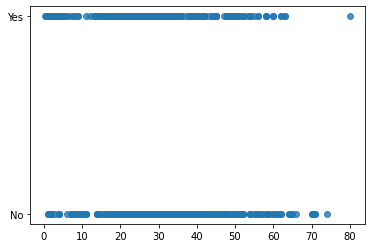

In [29]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data=df,logistic=True)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 42)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=["actual"],colnames=["predicted"])
print(confusion_matrix)

predicted   No  Yes
actual             
No         105    9
Yes         41   24


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          No       0.72      0.92      0.81       114
         Yes       0.73      0.37      0.49        65

    accuracy                           0.72       179
   macro avg       0.72      0.65      0.65       179
weighted avg       0.72      0.72      0.69       179

